In [1]:
# Robust Linear Models vs OLS

In [2]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
# Comparing OLS and RLM : Artificial data with outliers:

In [3]:
nsample = 50
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, (x1-5)**2))
X = sm.add_constant(X)

In [8]:
X[:5, :]

array([[ 1.        ,  0.        , 25.        ],
       [ 1.        ,  0.40816327, 21.0849646 ],
       [ 1.        ,  0.81632653, 17.5031237 ],
       [ 1.        ,  1.2244898 , 14.2544773 ],
       [ 1.        ,  1.63265306, 11.33902541]])

In [5]:
sig = 0.3   # smaller error variance makes OLS<->RLM contrast bigger
beta = [5, 0.5, -0.0]
y_true2 = np.dot(X, beta)
y2 = y_true2 + sig*1. * np.random.normal(size=nsample)
y2[[39,41,43,45,48]] -= 5   # add some outliers (10% of nsample)

In [9]:
y_true2[:5]

array([5.        , 5.20408163, 5.40816327, 5.6122449 , 5.81632653])

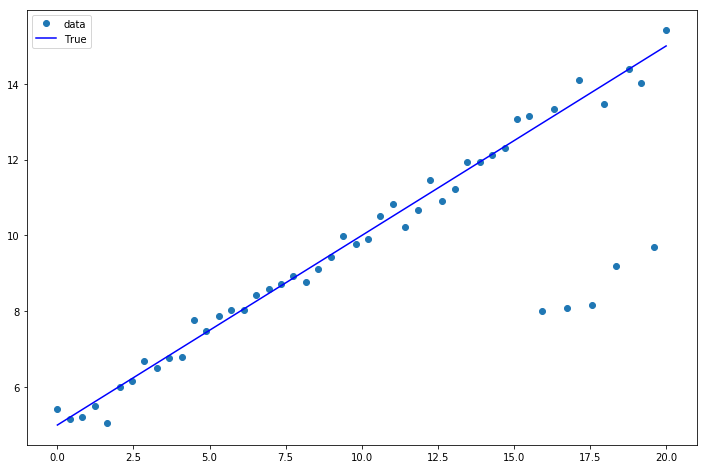

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(x1, y2, 'o',label="data")
ax.plot(x1, y_true2, 'b-', label="True")
ax.legend(loc="best")

In [ ]:
# Model 1: quadratic function with linear truth

In [ ]:
# Note that the quadratic term in OLS regression will capture outlier effects.

In [10]:
res = sm.OLS(y2, X).fit()
print(res.params)
print(res.bse)
print(res.predict())

[ 5.03896881  0.52752796 -0.01386879]
[0.47468666 0.07328521 0.00648461]
[ 4.69224905  4.96186339  5.22685672  5.48722905  5.74298038  5.9941107
  6.24062001  6.48250832  6.71977563  6.95242193  7.18044723  7.40385152
  7.62263481  7.83679709  8.04633837  8.25125864  8.45155791  8.64723617
  8.83829343  9.02472968  9.20654493  9.38373918  9.55631242  9.72426465
  9.88759588 10.04630611 10.20039533 10.34986354 10.49471076 10.63493696
 10.77054216 10.90152636 11.02788955 11.14963174 11.26675292 11.3792531
 11.48713228 11.59039045 11.68902761 11.78304377 11.87243892 11.95721307
 12.03736622 12.11289836 12.18380949 12.25009963 12.31176875 12.36881687
 12.42124399 12.4690501 ]


In [ ]:
# Estimate RLM:

In [11]:
resrlm = sm.RLM(y2, X).fit()
print(resrlm.params)
print(resrlm.bse)

[ 4.98450893e+00  5.11108795e-01 -3.18394701e-03]
[0.13768694 0.02125701 0.00188092]


In [ ]:
# Draw a plot to compare OLS estimates to the robust estimates:

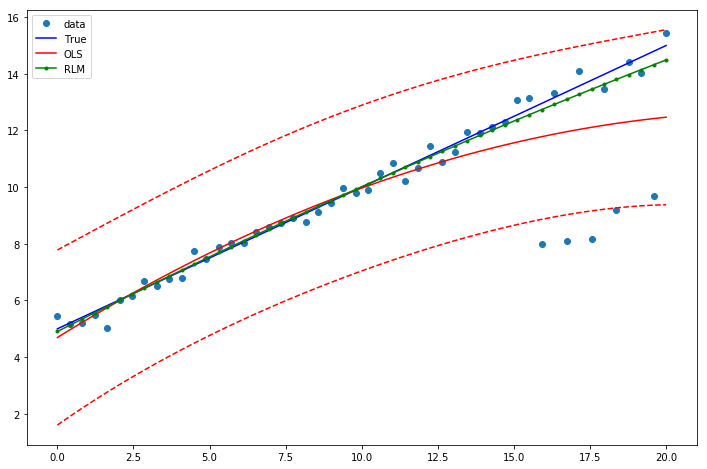

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(x1, y2, 'o',label="data")
ax.plot(x1, y_true2, 'b-', label="True")
prstd, iv_l, iv_u = wls_prediction_std(res)
ax.plot(x1, res.fittedvalues, 'r-', label="OLS")
ax.plot(x1, iv_u, 'r--')
ax.plot(x1, iv_l, 'r--')
ax.plot(x1, resrlm.fittedvalues, 'g.-', label="RLM")
ax.legend(loc="best")

In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_0.html